In [ ]:
import pandas as pd
df = pd.read_csv('sample_data.csv')

df.head()

,time_ref,account,code,country_code,product_type,value,status
0,202406,Exports,0,AE,Goods,282851040,F
1,202406,Exports,0,AG,Goods,515865,F
2,202406,Exports,0,AI,Goods,4913,F
3,202406,Exports,0,AL,Goods,245739,F
4,202406,Exports,0,AM,Goods,1081180,F


# Data Cleaning code for my Analysis to avoid any repeat values and to avoid some error 

In [ ]:
print("Missing values:\n", df.isnull().sum())
df.dropna(subset=['value'], inplace=True)

df.drop_duplicates(inplace=True)
df['time_ref'] = pd.to_datetime(df['time_ref'], format='%Y%m')

df['value'] = df['value'].astype(float)
print("Data after cleaning:\n", df.info())

Missing values:
 time_ref        0
account         0
code            0
country_code    0
product_type    0
value           0
status          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time_ref      24 non-null     datetime64[ns]
 1   account       24 non-null     object        
 2   code          24 non-null     int64         
 3   country_code  24 non-null     object        
 4   product_type  24 non-null     object        
 5   value         24 non-null     float64       
 6   status        24 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.4+ KB
Data after cleaning:
 None


# Data cleaning is done 
# Question 1: Top Five Countries by Export Value Over Time

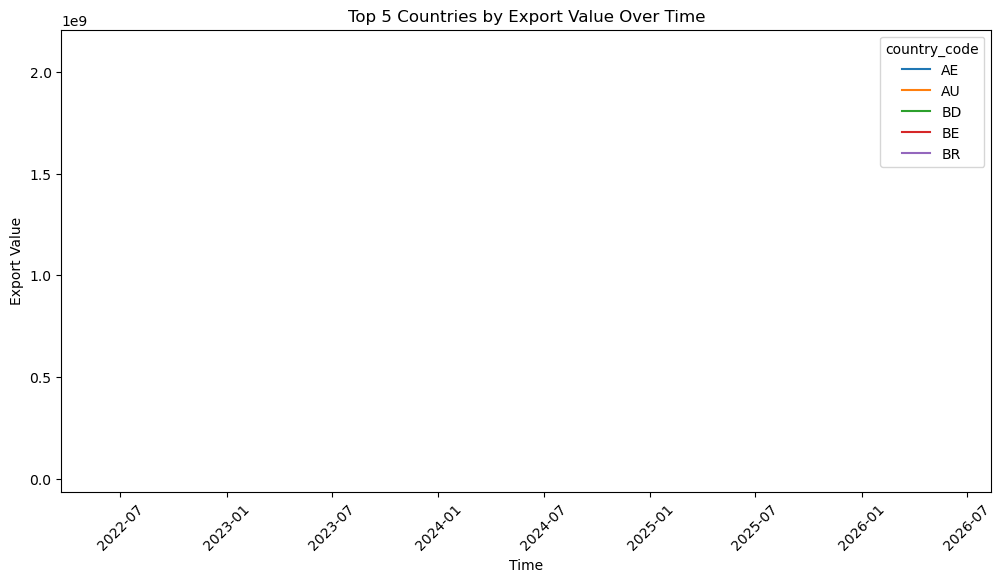

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


top_countries = df.groupby('country_code')['value'].sum().nlargest(5).index
top_countries_df = df[df['country_code'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_countries_df, x='time_ref', y='value', hue='country_code')

plt.title('Top 5 Countries by Export Value Over Time')
plt.xlabel('Time')

plt.ylabel('Export Value')
plt.xticks(rotation=45)

plt.show()


# the question 1 done the to five country is listed 
# Question 2: Contribution of Product Types to Export Value by Region

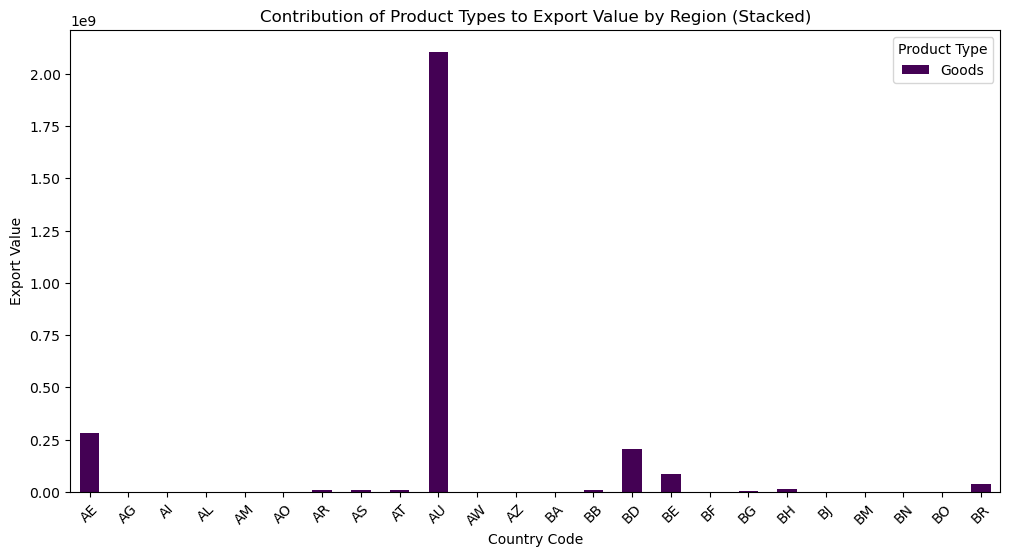

In [10]:
product_contribution = df.groupby(['country_code', 'product_type'])['value'].sum().unstack().fillna(0)
product_contribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Contribution of Product Types to Export Value by Region (Stacked)')
plt.xlabel('Country Code')

plt.ylabel('Export Value')
plt.legend(title='Product Type')

plt.xticks(rotation=45)
plt.show()

# question 2 done 
# Question 3: Seasonal Trends in Export Values Over Time by Country

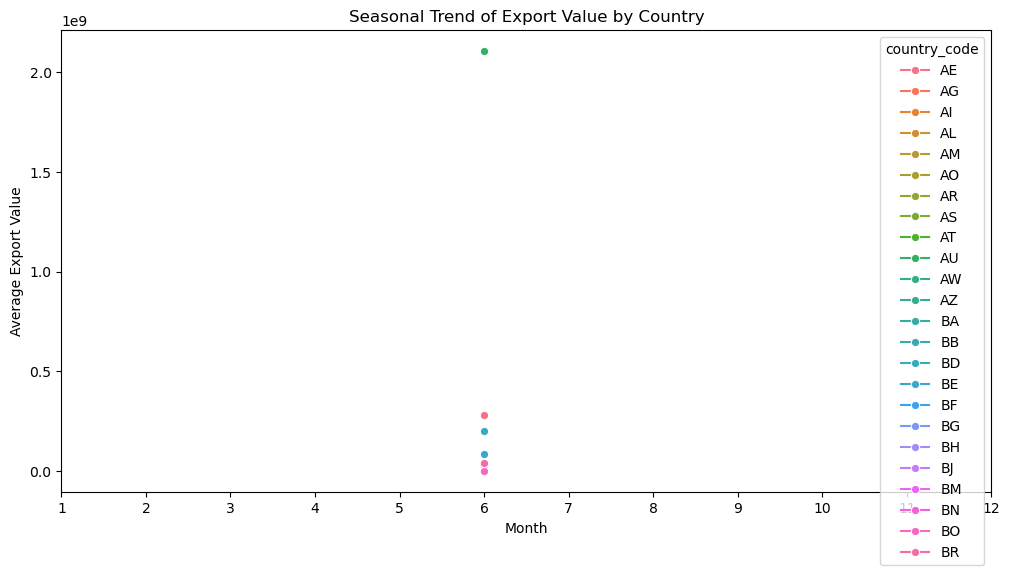

In [ ]:

df['month'] = df['time_ref'].dt.month
df['year'] = df['time_ref'].dt.year


monthly_trends = df.groupby(['month', 'country_code'])['value'].mean().reset_index()
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_trends, x='month', y='value', hue='country_code', marker="o")
plt.title('Seasonal Trend of Export Value by Country')

plt.xlabel('Month')
plt.ylabel('Average Export Value')

plt.xticks(range(1, 13))
plt.show()
